In [1]:
import pandas as pd
import numpy as np
import os

# visualize
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(11, 9))
plt.rc('font', size=13)

# turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")

# acquire
from env import host, user, password
from pydataset import data



In [76]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [129]:
from math import sqrt
from scipy import stats

# 1. In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

In [2]:
df_iris = sns.load_dataset('iris')

## print the first 3 rows

In [3]:
df_iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


## print the number of rows and columns (shape)

In [4]:
df_iris.shape

(150, 5)

## print the column names

In [5]:
list(df_iris.columns)

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

## print the data type of each column

In [6]:
df_iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

## print the summary statistics for each of the numeric variables. Would you recommend rescaling the data based on these statistics?

In [7]:
df_iris.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


# 2. Read the Table1_CustDetails table from the Excel_Exercises.xlsx file into a dataframe named df_excel.

In [8]:
df_excel = pd.read_excel('Spreadsheets_Exercises.xlsx', sheet_name='Table1_CustDetails')

In [9]:
df_excel.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.30,No
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,542.40,No
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.9,267.40,Yes


## assign the first 100 rows to a new dataframe, df_excel_sample

In [10]:
df_excel_sample = df_excel.head(100)

In [11]:
df_excel_sample

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.60,593.30,No
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.90,542.40,No
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.90,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.00,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.90,267.40,Yes
5,0013-MHZWF,Female,0,No,Yes,1,1,0,Credit card (automatic),69.40,571.45,No
6,0013-SMEOE,Female,1,Yes,No,1,2,2,Bank transfer (automatic),109.70,7904.25,No
7,0014-BMAQU,Male,0,Yes,No,2,2,2,Credit card (automatic),84.65,5377.80,No
8,0015-UOCOJ,Female,1,No,No,1,1,0,Electronic check,48.20,340.35,No
9,0016-QLJIS,Female,0,Yes,Yes,2,1,2,Mailed check,90.45,5957.90,No


## print the number of rows of your original dataframe

In [12]:
df_excel.index

RangeIndex(start=0, stop=7049, step=1)

## print the first 5 column names

In [13]:
df_excel.columns[0:5]

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents'], dtype='object')

## print the column names that have a data type of object

In [14]:
df_excel.dtypes

customer_id           object
gender                object
is_senior_citizen      int64
partner               object
dependents            object
phone_service          int64
internet_service       int64
contract_type          int64
payment_type          object
monthly_charges      float64
total_charges        float64
churn                 object
dtype: object

In [15]:
df_excel.columns[df_excel.dtypes == object]

Index(['customer_id', 'gender', 'partner', 'dependents', 'payment_type',
       'churn'],
      dtype='object')

## compute the range for each of the numeric variables.

In [16]:
df_excel.monthly_charges.max() - df_excel.monthly_charges.min()

100.5

In [17]:
df_excel.total_charges.max() - df_excel.total_charges.min()

8666.0

# 3. Read the data from this google sheet into a dataframe, df_google

In [18]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_googlesheet = pd.read_csv(csv_export_url)


## print the first 3 rows

In [19]:
df_googlesheet.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## print the number of rows and columns

In [20]:
df_googlesheet.shape

(891, 12)

## print the column names

In [21]:
df_googlesheet.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## print the data type of each column

In [22]:
df_googlesheet.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## print the summary statistics for each of the numeric variables

In [23]:
df_googlesheet.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## print the unique values for each of your categorical variables

In [24]:
df_ = df_googlesheet.select_dtypes(exclude=['int', 'float'])
for col in df_.columns:
    print(df_[col].unique())

['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'
 'Hewlett, Mrs. (Mary D Kingcome) ' 'Rice, Master. Eugene'
 'Williams, Mr. Charles Eugene'
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'
 'Masselmani, Mrs. Fatima' 'Fynney, Mr. Joseph J' 'Beesley, Mr. Lawrence'
 'McGowan, Miss. Anna "Annie"' 'Sloper, Mr. William Thompson'
 'Palsson, Miss. Torborg Danira'
 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)'
 'Emir, Mr. Farred Chehab' 'Fortune, Mr. Charles Alexander'
 'O\'Dwyer, Miss. Ellen "Nellie"' 'Todoro

In [25]:
for col in df_googlesheet:
    if df_googlesheet[col].dtypes == 'object':
        print(f'{col} has {df_googlesheet[col].nunique()} unique values.')

Name has 891 unique values.
Sex has 2 unique values.
Ticket has 681 unique values.
Cabin has 147 unique values.
Embarked has 3 unique values.


# 1. Make a function named get_titanic_data that returns the titanic data from the codeup data science database as a pandas data frame. Obtain your data from the Codeup Data Science Database.

In [26]:
import acquire

In [27]:
def get_titanic_data():
    # Create SQL query.
    sql_query = 'SELECT * FROM passengers'
    
    # Read in DataFrame from Codeup db.
    df = pd.read_sql(sql_query, acquire.get_connection('titanic_db'))
    
    return df

In [28]:
df_titanic = get_titanic_data()

In [29]:
df_titanic.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


# 2. Make a function named get_iris_data that returns the data from the iris_db on the codeup data science database as a pandas data frame. The returned data frame should include the actual name of the species in addition to the species_ids. Obtain your data from the Codeup Data Science Database.

In [30]:
def get_iris_data():
    # Create SQL query.
    sql_query = '''
    SELECT species_id,
				measurement_id,
                species_name,
                sepal_length,
                sepal_width,
                petal_length,
                petal_width
                FROM measurements
                JOIN species
                USING(species_id);
    '''
    
    # Read in DataFrame from Codeup db.
    df = pd.read_sql(sql_query, acquire.get_connection('iris_db'))
    
    return df

In [31]:
df_iris = get_iris_data()

In [32]:
df_iris.head()

,species_id,measurement_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,1,setosa,5.1,3.5,1.4,0.2
1,1,2,setosa,4.9,3.0,1.4,0.2
2,1,3,setosa,4.7,3.2,1.3,0.2
3,1,4,setosa,4.6,3.1,1.5,0.2
4,1,5,setosa,5.0,3.6,1.4,0.2


# 3. Once you've got your get_titanic_data and get_iris_data functions written, now it's time to add caching to them. To do this, edit the beginning of the function to check for a local filename like titanic.csv or iris.csv. If they exist, use the .csv file. If the file doesn't exist, then produce the SQL and pandas necessary to create a dataframe, then write the dataframe to a .csv file with the appropriate name.

In [33]:

os.path.isfile('titanic.csv')

True

In [34]:
os.path.isfile('iris.csv')

True

In [35]:
def get_titanic_data(cached=False):
    
    if cached == False or os.path.isfile('titanic_df.csv') == False:
    
    # Create SQL query.
        sql_query = 'SELECT * FROM passengers'
    
    # Read in DataFrame from Codeup db.
        df = pd.read_sql(sql_query, acquire.get_connection('titanic_db'))
    
        df.to_csv('titanic.csv')
    
    else:
        
        # If csv file exists or cached == True, read in data from csv.
        df = pd.read_csv('titanic_df.csv', index_col=0)
        
    return df

In [36]:
new_df_titanic = get_titanic_data()

new_df_titanic.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


In [37]:
new_df_titanic = get_titanic_data()

new_df_titanic.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


In [54]:
def get_iris_data(cached=False):
    
    if cached == False or os.path.isfile('iris.csv') == False:
    
    # Create SQL query.
        sql_query = '''
        SELECT species_id,
				measurement_id,
                species_name,
                sepal_length,
                sepal_width,
                petal_length,
                petal_width
                FROM measurements
                JOIN species
                USING(species_id);
        '''
    
    # Read in DataFrame from Codeup db.
        df = pd.read_sql(sql_query, acquire.get_connection('iris_db'))
        
        df.to_csv('iris.csv')
        
    else:
        # If csv file exists or cached == True, read in data from csv.
        df = pd.read_csv('iris.csv', index_col=0)
    
    return df

In [55]:
new_df_iris = get_iris_data()

new_df_iris.head()

,species_id,measurement_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,1,setosa,5.1,3.5,1.4,0.2
1,1,2,setosa,4.9,3.0,1.4,0.2
2,1,3,setosa,4.7,3.2,1.3,0.2
3,1,4,setosa,4.6,3.1,1.5,0.2
4,1,5,setosa,5.0,3.6,1.4,0.2


# Data Preparation

## 1. Use the function defined in acquire.py to load the iris data.

In [56]:
import acquire

In [57]:
df = get_iris_data(cached=False)

df.head()

,species_id,measurement_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,1,setosa,5.1,3.5,1.4,0.2
1,1,2,setosa,4.9,3.0,1.4,0.2
2,1,3,setosa,4.7,3.2,1.3,0.2
3,1,4,setosa,4.6,3.1,1.5,0.2
4,1,5,setosa,5.0,3.6,1.4,0.2


## 2. Drop the species_id and measurement_id columns.

In [58]:
df.drop_duplicates(inplace=True)

In [59]:
cols_to_drop = ['species_id', 'measurement_id']
df = df.drop(columns=cols_to_drop)

In [60]:
df.head()

,species_name,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


## 3. Rename the species_name column to just species.

In [61]:
df = df.rename(columns={'species_name' : 'species'})

In [62]:
df.head()

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


## 4. Create dummy variables of the species name.

In [63]:
dummies = pd.get_dummies(df[['species']])

In [64]:
dummies.head()

,species_setosa,species_versicolor,species_virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [65]:
df = pd.concat([df, dummies], axis=1)

In [66]:
df.head()

,species,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
0,setosa,5.1,3.5,1.4,0.2,1,0,0
1,setosa,4.9,3.0,1.4,0.2,1,0,0
2,setosa,4.7,3.2,1.3,0.2,1,0,0
3,setosa,4.6,3.1,1.5,0.2,1,0,0
4,setosa,5.0,3.6,1.4,0.2,1,0,0


## 5. Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [71]:
def clean_iris():
    import acquire
    df = get_iris_data(cached=False)
    df.drop_duplicates(inplace=True)
    cols_to_drop = ['species_id', 'measurement_id']
    df = df.drop(columns=cols_to_drop)
    df = df.rename(columns={'species_name' : 'species'})
    dummies = pd.get_dummies(df[['species']])
    df = pd.concat([df, dummies], axis=1)
    return df

In [72]:
iris = clean_iris()

iris.head()

,species,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
0,setosa,5.1,3.5,1.4,0.2,1,0,0
1,setosa,4.9,3.0,1.4,0.2,1,0,0
2,setosa,4.7,3.2,1.3,0.2,1,0,0
3,setosa,4.6,3.1,1.5,0.2,1,0,0
4,setosa,5.0,3.6,1.4,0.2,1,0,0


In [69]:
iris.shape

(150, 8)

In [70]:
iris.tail()

,species,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
145,virginica,6.7,3.0,5.2,2.3,0,0,1
146,virginica,6.3,2.5,5.0,1.9,0,0,1
147,virginica,6.5,3.0,5.2,2.0,0,0,1
148,virginica,6.2,3.4,5.4,2.3,0,0,1
149,virginica,5.9,3.0,5.1,1.8,0,0,1


In [73]:

# find what number of values in each column are missing in the data:
missing = iris.isnull().sum()

In [74]:

# observe how many columns have any missing values
missing[missing > 0]

Series([], dtype: int64)

In [77]:
train_validate, test = train_test_split(iris, test_size=0.2, random_state=319)

In [79]:
train, validate = train_test_split(train_validate, train_size=0.7, random_state=319)

In [80]:
def prep_iris():
    df = clean_iris()
    
    train_validate, test = train_test_split(iris, test_size=0.2, random_state=319)
    
    train, validate = train_test_split(train_validate, train_size=0.7, random_state=319)
    
    return train, validate, test

# Data Exploration

## 1. Split your data into train, validate, and test samples

In [84]:
train.head()

,species,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
19,setosa,5.1,3.8,1.5,0.3,1,0,0
90,versicolor,5.5,2.6,4.4,1.2,0,1,0
47,setosa,4.6,3.2,1.4,0.2,1,0,0
67,versicolor,5.8,2.7,4.1,1.0,0,1,0
91,versicolor,6.1,3.0,4.6,1.4,0,1,0


In [87]:
train.shape

(84, 8)

In [110]:
train.dtypes

species                object
sepal_length          float64
sepal_width           float64
petal_length          float64
petal_width           float64
species_setosa          uint8
species_versicolor      uint8
species_virginica       uint8
dtype: object

In [113]:
train = train.drop(columns=['species_setosa', 'species_virginica', 'species_versicolor'])

train.head()

,species,sepal_length,sepal_width,petal_length,petal_width
19,setosa,5.1,3.8,1.5,0.3
90,versicolor,5.5,2.6,4.4,1.2
47,setosa,4.6,3.2,1.4,0.2
67,versicolor,5.8,2.7,4.1,1.0
91,versicolor,6.1,3.0,4.6,1.4


In [85]:
test.head()

,species,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
21,setosa,5.1,3.7,1.5,0.4,1,0,0
109,virginica,7.2,3.6,6.1,2.5,0,0,1
11,setosa,4.8,3.4,1.6,0.2,1,0,0
5,setosa,5.4,3.9,1.7,0.4,1,0,0
130,virginica,7.4,2.8,6.1,1.9,0,0,1


In [88]:
test.shape

(30, 8)

In [86]:
validate.head()

,species,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
132,virginica,6.4,2.8,5.6,2.2,0,0,1
106,virginica,4.9,2.5,4.5,1.7,0,0,1
133,virginica,6.3,2.8,5.1,1.5,0,0,1
49,setosa,5.0,3.3,1.4,0.2,1,0,0
117,virginica,7.7,3.8,6.7,2.2,0,0,1


In [89]:
validate.shape

(36, 8)

## 2. Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

In [92]:
melted_train = train.drop(columns=['species_setosa', 'species_virginica', 'species_versicolor'])

melted_train

,species,sepal_length,sepal_width,petal_length,petal_width
19,setosa,5.1,3.8,1.5,0.3
90,versicolor,5.5,2.6,4.4,1.2
47,setosa,4.6,3.2,1.4,0.2
67,versicolor,5.8,2.7,4.1,1.0
91,versicolor,6.1,3.0,4.6,1.4
138,virginica,6.0,3.0,4.8,1.8
2,setosa,4.7,3.2,1.3,0.2
78,versicolor,6.0,2.9,4.5,1.5
41,setosa,4.5,2.3,1.3,0.3
145,virginica,6.7,3.0,5.2,2.3


In [95]:
melted_train = melted_train.melt(id_vars=['species'], var_name='measurement', value_name='length')

melted_train

,species,measurement,length
0,setosa,sepal_length,5.1
1,versicolor,sepal_length,5.5
2,setosa,sepal_length,4.6
3,versicolor,sepal_length,5.8
4,versicolor,sepal_length,6.1
...,...,...,...
331,virginica,petal_width,2.4
332,virginica,petal_width,2.0
333,setosa,petal_width,0.2
334,versicolor,petal_width,1.3


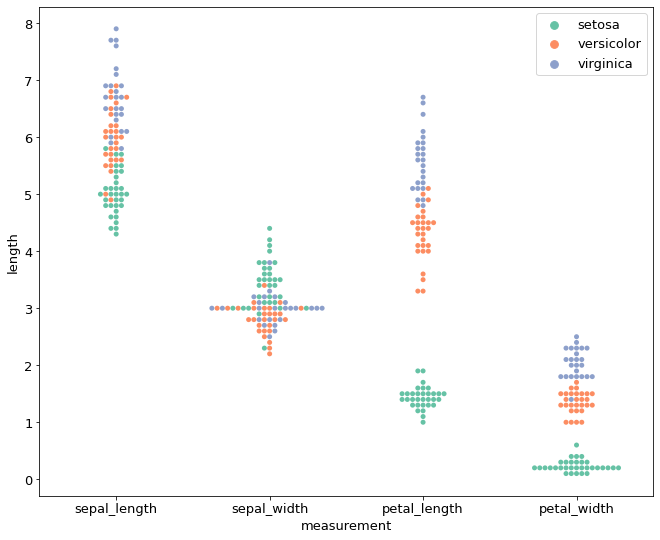

In [96]:
sns.swarmplot(x="measurement", y="length", data=melted_train, hue="species", palette="Set2")
plt.legend()

## 3. Create 4 subplots (2 rows x 2 columns) of scatterplots.

### sepal_length x sepal_width

### petal_length x petal_width

### sepal_area x petal_area

### sepal_length x petal_length


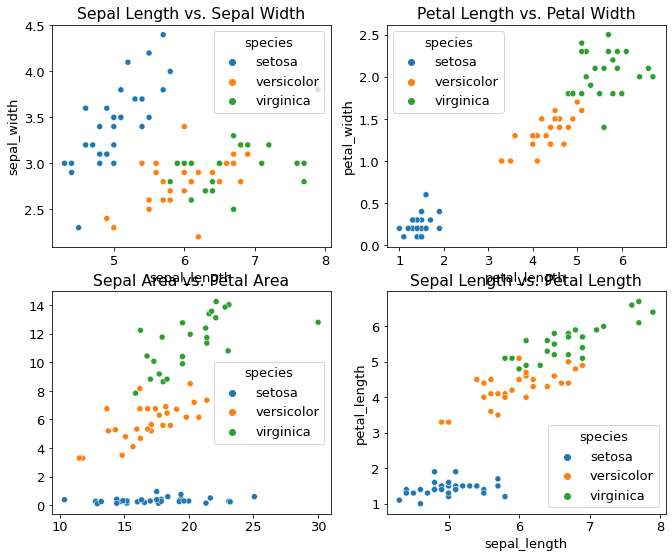

In [109]:
n_rows = 2
n_cols = 2

# plot the first subplot
plt.subplot(n_rows, n_cols, 1)
sns.scatterplot(data = train, x = train.sepal_length, y = train.sepal_width, hue = 'species')
plt.title('Sepal Length vs. Sepal Width')

# the second subplot
plt.subplot(n_rows, n_cols, 2)
sns.scatterplot(data = train, x = train.petal_length, y = train.petal_width, hue = 'species')
plt.title('Petal Length vs. Petal Width')

plt.subplot(n_rows, n_cols, 3)
sns.scatterplot(data = train, x = (train.sepal_length * train.sepal_width), y = (train.petal_length * train.petal_width), hue = 'species')
plt.title('Sepal Area vs. Petal Area')

plt.subplot(n_rows, n_cols, 4)
sns.scatterplot(data = train, x = train.sepal_length, y = train.petal_length, hue = 'species')
plt.title('Sepal Length vs. Petal Length')

plt.show()

## 4. Create a heatmap of each variable layering correlation coefficient on top.

<AxesSubplot:>

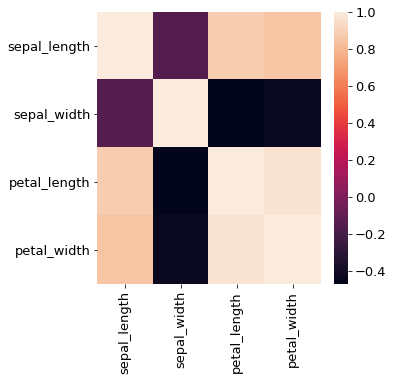

In [120]:
plt.figure(figsize=(5,5))
sns.heatmap(train.corr())

## 5. Create a scatter matrix visualizing the interaction of each variable.

array([[<AxesSubplot:xlabel='sepal_length', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='petal_length', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='petal_width', ylabel='sepal_length'>],
       [<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='petal_length', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='petal_width', ylabel='sepal_width'>],
       [<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='petal_length'>,
        <AxesSubplot:xlabel='petal_length', ylabel='petal_length'>,
        <AxesSubplot:xlabel='petal_width', ylabel='petal_length'>],
       [<AxesSubplot:xlabel='sepal_length', ylabel='petal_width'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='petal_width'>,
        <AxesSubplot:xlabel='petal_length', ylabel='petal_

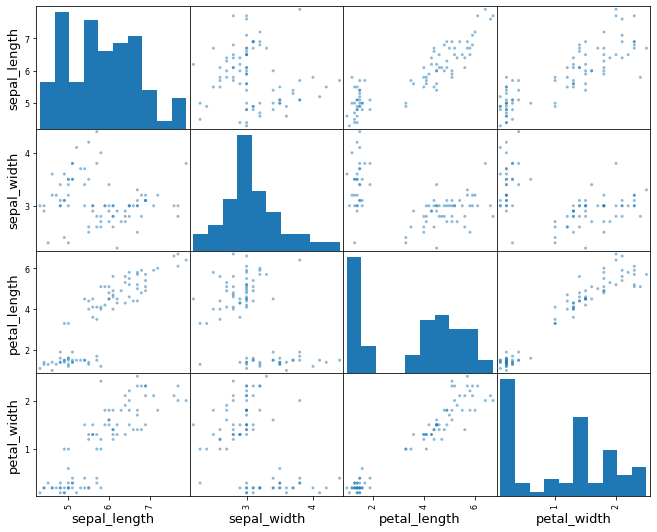

In [122]:
pd.plotting.scatter_matrix(train)

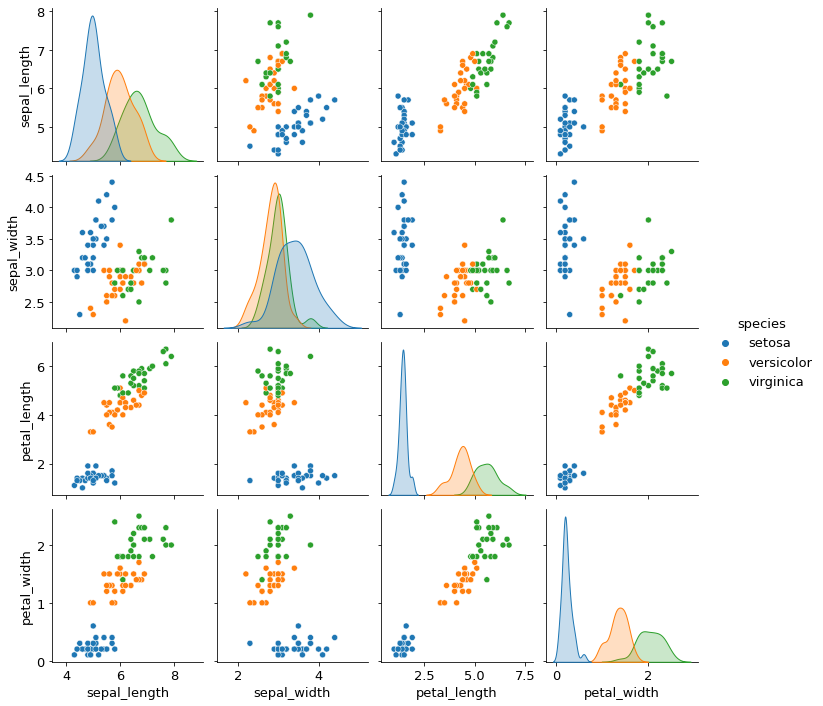

In [124]:
sns.pairplot(train, hue = 'species')

## 6. Is the sepal length significantly different in virginica compared to versicolor? Run a statistical experiment to test this.

### Make sure to include a null hypothesis, alternative hypothesis, results, and summary.

### What is your takeaway from this statistical testing?

In [125]:
H0 = 'there is no significant difference between the sepal length of the virginica species and the versicolor species'

In [126]:
H1 = 'there is a significant difference between the sepal length of the virginica speces and the versicolor species'

In [127]:
alpha = .05

In [132]:
x1 = train[train.species == 'virginica'].sepal_length
x2 = train[train.species == 'versicolor'].sepal_length

xbar1 = x1.mean()
xbar2 = x2.mean()

n1 = x1.shape[0]
n2 = x2.shape[0]

s1 = x1.std()
s2 = x2.std()

degf = n1 + n2 - 2

s_p = sqrt(((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / (n1 + n2 - 2))
s_p

standard_error = se = sqrt(s1**2 / n1 + s2**2 / n2)

t = (xbar1 - xbar2) / (s_p * sqrt(1/n1 + 1/n2))
t

4.893158377673722

In [133]:
p = stats.t(degf).sf(t) * 2

print(p)

if p < alpha:
    print(H1)
else:
    print(H0)

1.0738737206453292e-05
there is a significant difference between the sepal length of the virginica speces and the versicolor species


## 7. Create any other visualizations and run any other statistical tests you think will be helpful in exploring this data set.

<AxesSubplot:xlabel='petal_width', ylabel='species'>

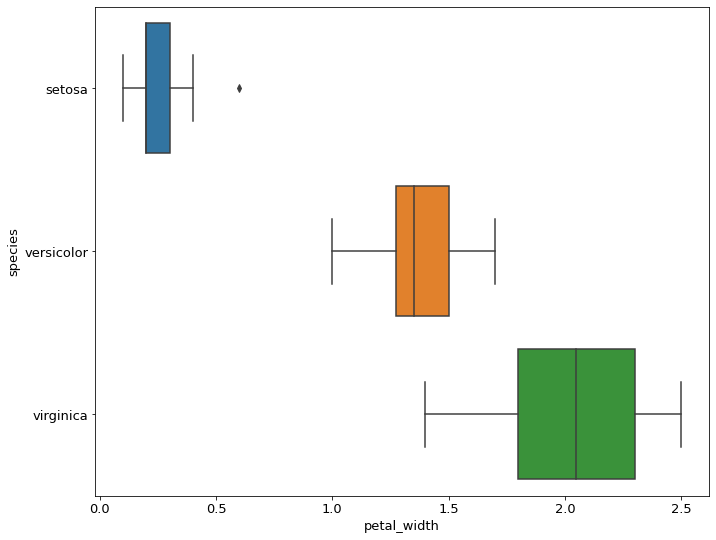

In [134]:
sns.boxplot(data=train, y='species', x='petal_width')

Text(0.5, 0, 'Petal Area')

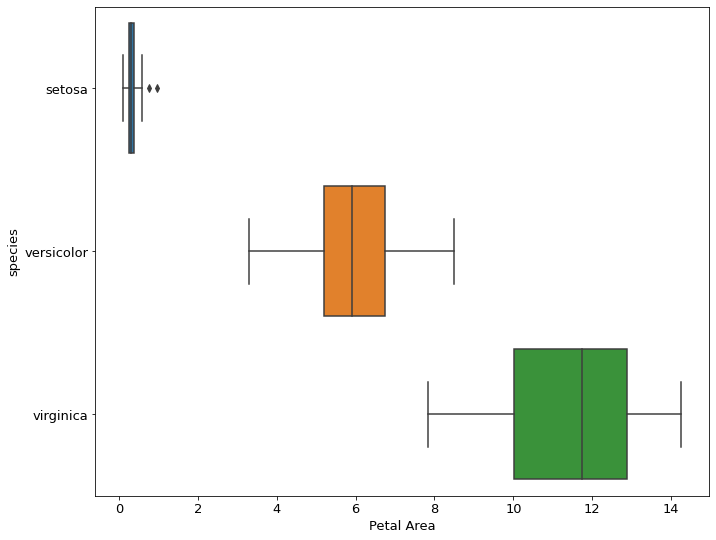

In [142]:
sns.boxplot(data=train, y='species', x=(train.petal_width * train.petal_length))
plt.xlabel('Petal Area')

Text(0.5, 0, 'Sepal Area')

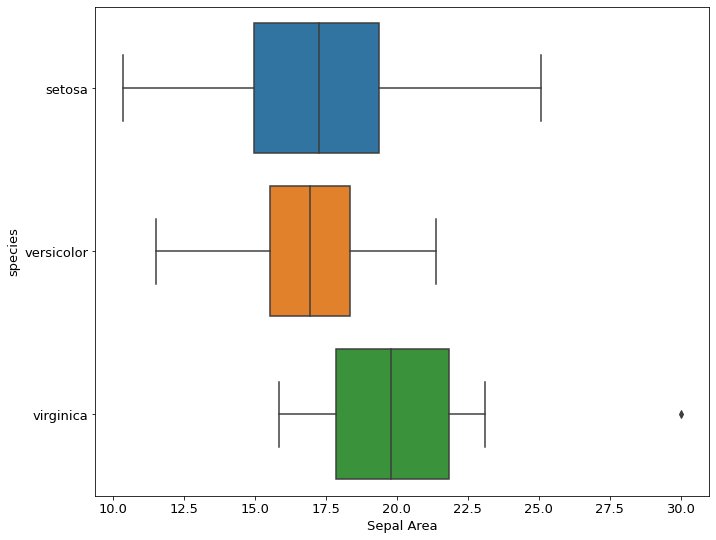

In [141]:
sns.boxplot(data=train, y='species', x=(train.sepal_width * train.sepal_length))
plt.xlabel('Sepal Area')